In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df_index= pd.read_excel(r"上证50指数（CCt）.xlsx")
#delete row 0 1 2
df_index.drop([0,1,2],inplace=True)
df_index.head()
#change column name to Date and Index_Level
df_index.columns=['date','index_level']
#sort by date
df_index.sort_values(by='date',ascending=True,inplace=True)
#drop index 3595,3594
#df_index.drop([3595,3594],inplace=True)
df_index

,date,index_level
2373,2013-04-08,1773.1
2372,2013-04-09,1788.63
2371,2013-04-10,1787.93
2370,2013-04-11,1784.13
2369,2013-04-12,1774.51
...,...,...
7,2022-12-26,2607.52
6,2022-12-27,2632.45
5,2022-12-28,2638.31
4,2022-12-29,2622.07


In [17]:
df_index['date']=pd.to_datetime(df_index['date'])
df_index.set_index("date", inplace=True)
monthly_groups=df_index.groupby(pd.Grouper(freq='M'))
#find the last day of each month
df_index_monthly=monthly_groups.last()
df_index_monthly.dropna(inplace=True)

In [21]:
#add index month1 month2 month3...
df_index_monthly['month'] = range(1, len(df_index_monthly) + 1)
df_index_monthly.set_index("month", inplace=True)
df_index_monthly


,index_level
month,
1,1766.04
2,1841.37
3,1552.38
4,1504.17
5,1589.78
...,...
113,2761.78
114,2610.12
115,2295.92


In [22]:
df_index_monthly['max_12'] = None
for i in range(13, len(df_index_monthly)+1):
    previous_12 = df_index_monthly.loc[i-12:i-1, 'index_level']  
    max_value = previous_12.max()  
    df_index_monthly.at[i, 'max_12'] = max_value  

df_index_monthly

,index_level,max_12
month,,
1,1766.04,None
2,1841.37,None
3,1552.38,None
4,1504.17,None
5,1589.78,None
...,...,...
113,2761.78,3274.32
114,2610.12,3274.32
115,2295.92,3274.32


In [23]:
#calculate ML = index_level/(max of last 12 months) and create a new column
df_index_monthly['ML'] = df_index_monthly['index_level']/df_index_monthly['max_12']
df_index_monthly

,index_level,max_12,ML
month,,,
1,1766.04,None,NaN
2,1841.37,None,NaN
3,1552.38,None,NaN
4,1504.17,None,NaN
5,1589.78,None,NaN
...,...,...,...
113,2761.78,3274.32,0.843467
114,2610.12,3274.32,0.797149
115,2295.92,3274.32,0.70119


In [24]:
#find the mean and standard deviation of ML for past 12 months
df_index_monthly['mean_12'] = None
df_index_monthly['std_12'] = None
for i in range(24, len(df_index_monthly)+1):
    previous_12 = df_index_monthly.loc[i-12:i-1, 'ML']  
    mean_value = previous_12.mean()  
    std_value = previous_12.std()  
    df_index_monthly.at[i, 'mean_12'] = mean_value  
    df_index_monthly.at[i, 'std_12'] = std_value

df_index_monthly

,index_level,max_12,ML,mean_12,std_12
month,,,,,
1,1766.04,None,NaN,None,None
2,1841.37,None,NaN,None,None
3,1552.38,None,NaN,None,None
4,1504.17,None,NaN,None,None
5,1589.78,None,NaN,None,None
...,...,...,...,...,...
113,2761.78,3274.32,0.843467,0.829371,0.037375
114,2610.12,3274.32,0.797149,0.830962,0.037549
115,2295.92,3274.32,0.70119,0.826476,0.038151


In [25]:
CCt = -1
df_index_monthly['CCt'] = None
for i in range(12+13, len(df_index_monthly)+1):
    previous_12 = df_index_monthly.loc[i-12:i-1, 'ML'] 
    ML_mean =  previous_12.mean()  
    ML_sd = previous_12.std()
    if df_index_monthly['ML'][i] < ML_mean - 1.5*ML_sd:
        CCt = 1

    else:
        CCt = 0

    df_index_monthly.at[i, 'CCt'] = CCt

In [26]:
#to csv
df_index_monthly.to_csv(r'1.5_50_IL_Monthly_ML.csv', index = True, header=True)

In [27]:
df_index_monthly.describe()

,index_level
count,117.000000
mean,2559.181026
std,581.392391
min,1464.320000
25%,2210.450000
50%,2635.250000
75%,2930.600000
max,3756.860000


In [28]:
df_index_monthly['CCt'].describe()

count     93
unique     2
top        0
freq      79
Name: CCt, dtype: int64

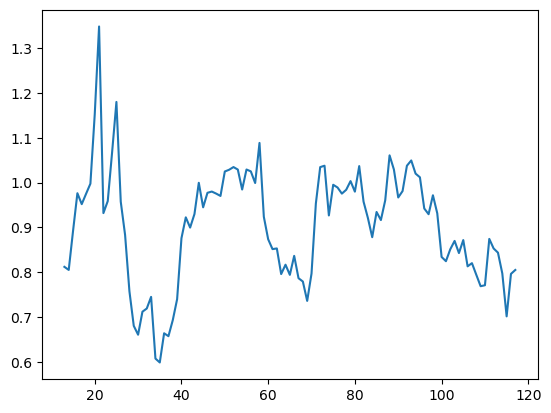

In [29]:
ypoints = df_index_monthly['ML']
plt.plot(ypoints)

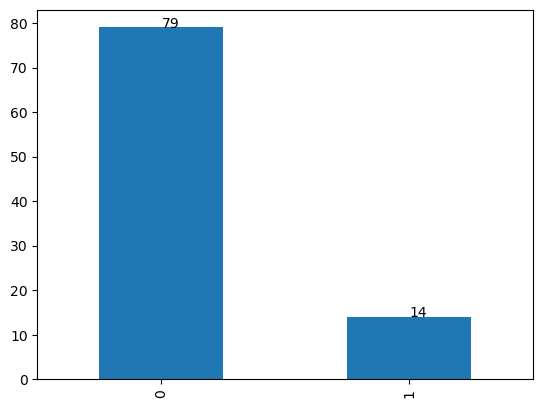

In [30]:
df_index_monthly['CCt'].value_counts().plot(kind='bar')
for index, value in enumerate(df_index_monthly['CCt'].value_counts()):
    plt.text(index, value, str(value))

plt.show()